In [1]:
#Importing important libraries
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
#Creating a MDP Environment  using class method
class MDP_Environment():
    def __init__(self):
        #Initializing state vale function(0 at all states)
        self.V = np.zeros(4)
        #Defining initial policy
        self.pi = ['S','S','S','S']
        #Defining transition probability matrix for leave/go back.
        self.P_leave = np.array([ 
          [0,0.2,0.3,0.5],
          [0.5,0,0.5,0],
          [0,0.5,0,0.5],
          [0,0.5,0.5,0]
         ])
        #Defining transition probability matrix for stay/go back.
        self.P_stay = P_stay = np.array([ 
          [1,0,0,0],
          [0.2,0.8,0,0],
          [0,0.2,0.8,0],
          [0,0,0.2,0.8]
         ])
        #Reward structure for staying in a state
        self.rewards_stay = np.array([3,2,1,0])
        #Reward structure for leaving a state
        self.rewards_leave = np.array([2,1,3,10])

In [3]:
V = np.zeros(4)
#Function to compute state value function, which takes discount factor and number of iterations as arguments.
def state_val_function(dis_factor, iters):
    env = MDP_Environment()
    for _ in range(iters):
        for i in range(4):
            #Computing state value function if agent chooses to 'Stay'
            if env.pi[i] == 'S':
                V[i] = env.rewards_stay[i] + (dis_factor * np.dot(env.P_stay[i], V))
                
            #Computing state value function if agent chooses to 'leave'    
            elif env.pi[i] == 'L':
                V[i] = env.rewards_leave[i] + (dis_factor * np.dot(env.P_leave[i], V))
    return V

In [4]:
def policy_iteration(dis_factor, theta, max_iters):
    env = MDP_Environment()
    policy_stable = False
    iters = 1
    while not policy_stable and iters <= max_iters:
        print(f"\nPolicy Iteration  | Iteration = {iters}")
        evaluate_policy(env, dis_factor, theta)
        policy_stable = improve_policy(env, dis_factor)
        
        iters += 1      
    print('\033[1m' + f"Optimal Policy ={env.pi}" + '\033[0m' )
    print('\033[1m' + f"State Value Function Corresponding to Optimal Policy ={env.V}" + '\033[0m')
    return env.V

In [5]:
def evaluate_policy(env, dis_factor, theta):
    sweep = 0
    delta = copy.copy(theta)
    V = copy.copy(env.V)
    while delta >= theta:
        delta = 0
        for i in range(4):
            cur_val = copy.copy(env.V[i])
            new_val = 0
            Q_s = env.rewards_stay[i] + dis_factor*(np.dot(env.P_stay[i], env.V))
            Q_l = env.rewards_leave[i] + dis_factor*(np.dot(env.P_leave[i], env.V))
            new_val = max(Q_s, Q_l)
            env.V[i] = (new_val)
            delta = max(delta, abs(cur_val - new_val))
        sweep += 1
    
    print(f"Policy Evaluation | #Sweeps = {sweep}")

In [6]:
def improve_policy(env, dis_factor):
    print(f"Policy Improvement")
    policy_stable = True
    for i in range(4):
        old_actions = copy.copy(env.pi[i])
        Q_s = env.rewards_stay[i] + dis_factor*(np.dot(env.P_stay[i], env.V))
        Q_l = env.rewards_leave[i] + dis_factor*(np.dot(env.P_leave[i], env.V))
        if Q_s > Q_l:
            env.pi[i] = 'S'
        else:
            env.pi[i] = 'L'
    new_actions = env.pi[i]
    if not np.array_equal(old_actions, new_actions):
            policy_stable =  False
        
    return policy_stable       

In [7]:
def value_iteration(dis_factor, theta, max_iters):
    env = MDP_Environment()
    delta = copy.copy(theta)
    iters = 1
    
    while delta >= theta and iters <= max_iters:
        print(f"\nValue Iteration  | Iteration = {iters}")
        delta = bellman_optimal_update(env, dis_factor)
        iters += 1 
    greedy_policy(env, dis_factor)
    print('\033[1m' + f"{env.pi}" + '\033[0m')
    print('\033[1m' + f"{env.V}" + '\033[0m')       

In [8]:
def bellman_optimal_update(env, dis_factor):
    print(f"Bellman Optimatlity Update")
    delta = 0
   
    for i in range(4):
        cur_val = copy.copy(env.V[i])
        Q_s = env.rewards_stay[i] + dis_factor*(np.dot(env.P_stay[i], env.V))
        Q_l = env.rewards_leave[i] + dis_factor*(np.dot(env.P_leave[i], env.V))
        new_val = max(Q_s, Q_l)
        env.V[i] = (new_val)
        delta = max(delta, abs(cur_val - new_val))
    return delta      

In [9]:
def greedy_policy(env, dis_factor):
    print(f"Greedifying Policy")
    
    for i in range(4):
        
        old_actions = copy.copy(env.pi[i])
        Q_s = env.rewards_stay[i] + dis_factor*(np.dot(env.P_stay[i], env.V))
        Q_l = env.rewards_leave[i] + dis_factor*(np.dot(env.P_leave[i], env.V))
        if Q_s > Q_l:
            env.pi[i] = 'S'
        else:
            env.pi[i] = 'L'  
    V_opt  = env.V
    return V_opt    

In [10]:
# Discount Factor
dis_factor = 0.9          
# Threshold for stopping the policy evaluation (or prediction) algo
theta = 0.1
# Maximum Iterations for the Policy Iteration Algorithms
max_iters = 100

In [11]:
# Calculating state value function for policy: ['S', 'S', 'S', 'S']
V_pi = state_val_function(dis_factor, max_iters)
print('\033[1m' + "State value function according to policy: ['S', 'S', 'S', 'S']" + '\033[0m')
for i, value in zip(['A', 'B', 'C', 'D'], V_pi):
    print('\033[1m' + f"V^pi({i}) = {value:.2f}" + '\033[0m')

State value function according to policy: ['S', 'S', 'S', 'S']
V^pi(A) = 30.00
V^pi(B) = 26.43
V^pi(C) = 20.56
V^pi(D) = 13.22


In [12]:
# Running policy iteration to find optimal policy
policy_iteration(dis_factor, theta, max_iters)


Policy Iteration  | Iteration = 1
Policy Evaluation | #Sweeps = 22
Policy Improvement

Policy Iteration  | Iteration = 2
Policy Evaluation | #Sweeps = 1
Policy Improvement
Optimal Policy =['L', 'L', 'L', 'L']
State Value Function Corresponding to Optimal Policy =[38.03026122 35.30409374 38.25916535 43.10346659]


array([38.03026122, 35.30409374, 38.25916535, 43.10346659])

In [13]:
# Running value to find optimal value function and greedy policy
value_iteration(dis_factor, theta, max_iters)


Value Iteration  | Iteration = 1
Bellman Optimatlity Update

Value Iteration  | Iteration = 2
Bellman Optimatlity Update

Value Iteration  | Iteration = 3
Bellman Optimatlity Update

Value Iteration  | Iteration = 4
Bellman Optimatlity Update

Value Iteration  | Iteration = 5
Bellman Optimatlity Update

Value Iteration  | Iteration = 6
Bellman Optimatlity Update

Value Iteration  | Iteration = 7
Bellman Optimatlity Update

Value Iteration  | Iteration = 8
Bellman Optimatlity Update

Value Iteration  | Iteration = 9
Bellman Optimatlity Update

Value Iteration  | Iteration = 10
Bellman Optimatlity Update

Value Iteration  | Iteration = 11
Bellman Optimatlity Update

Value Iteration  | Iteration = 12
Bellman Optimatlity Update

Value Iteration  | Iteration = 13
Bellman Optimatlity Update

Value Iteration  | Iteration = 14
Bellman Optimatlity Update

Value Iteration  | Iteration = 15
Bellman Optimatlity Update

Value Iteration  | Iteration = 16
Bellman Optimatlity Update

Value Iteration 

In [14]:
# Optimal Policy
V_opt = policy_iteration(dis_factor, theta, max_iters)


Policy Iteration  | Iteration = 1
Policy Evaluation | #Sweeps = 22
Policy Improvement

Policy Iteration  | Iteration = 2
Policy Evaluation | #Sweeps = 1
Policy Improvement
Optimal Policy =['L', 'L', 'L', 'L']
State Value Function Corresponding to Optimal Policy =[38.03026122 35.30409374 38.25916535 43.10346659]


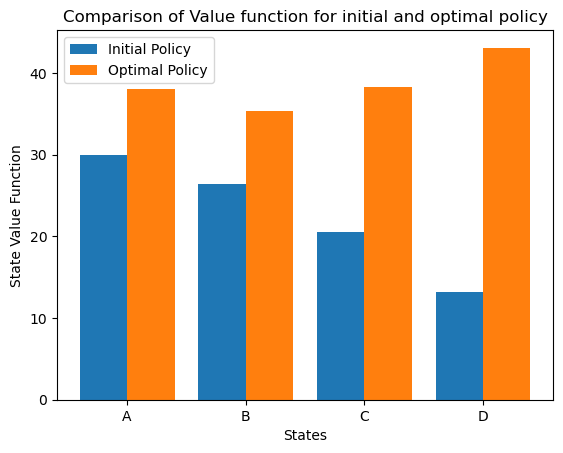

In [15]:
# Comparing state value function for initial policy(['S', 'S', 'S', 'S']) and Optimal Policy
states = ['A', 'B', 'C', 'D']
X_axis = np.arange(len(states))
plt.bar(X_axis - 0.2,V_pi , 0.4, label = 'Initial Policy')
plt.bar(X_axis + 0.2,V_opt, 0.4, label = 'Optimal Policy')  
plt.xticks(X_axis, states)
plt.xlabel("States")
plt.ylabel("State Value Function")
plt.title("Comparison of Value function for initial and optimal policy")
plt.legend()
plt.show()